In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/disease-symptoms-and-patient-profile-dataset/Disease_symptom_and_patient_profile_dataset.csv')

In [4]:
df.head

<bound method NDFrame.head of          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low       

In [5]:
df.duplicated().sum()

49

In [6]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


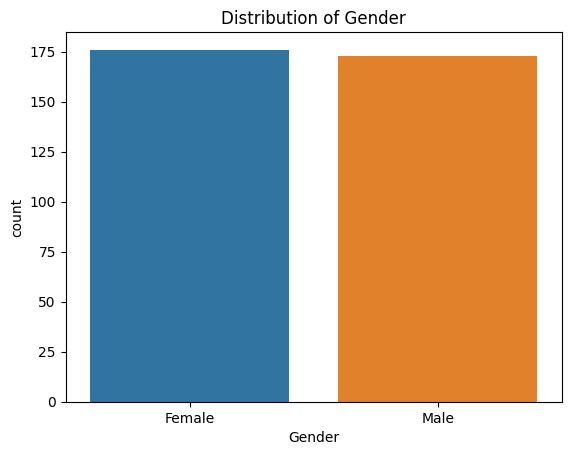

In [7]:
# Bar plot for Gender
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


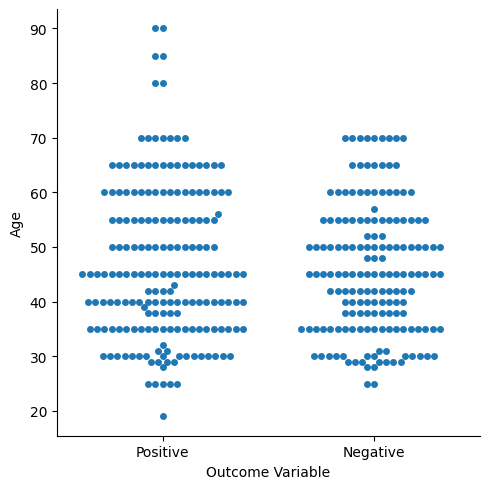

In [8]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm")  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


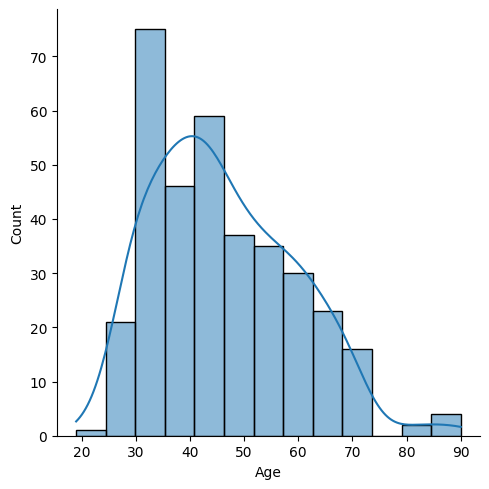

In [9]:
sns.displot(df['Age'] , kde=True)

In [10]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome Variable'], axis=1)
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
# Initialize StandardScaler

In [12]:

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the feature categories
binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
categorical_cols = ['Blood Pressure', 'Cholesterol Level', 'Gender']
numerical_cols = ['Age']

# Define transformers
ordinal_transformer = OrdinalEncoder(categories=[['No', 'Yes']] * len(binary_cols))
onehot_transformer = OneHotEncoder(drop='first', sparse=False)
scaler = StandardScaler()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', ordinal_transformer, binary_cols),
        ('categorical', onehot_transformer, categorical_cols),
        ('scaler', scaler, numerical_cols)
    ]
)


In [13]:
onehot_encoder = OneHotEncoder(sparse=False)

In [14]:
X_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.transform(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
y_train_reshaped = np.array(y_train).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

# Fit and transform the training data
y_train_encoded = onehot_encoder.fit_transform(y_train_reshaped)

# Transform the test data
y_test_encoded = onehot_encoder.transform(y_test_reshaped)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
X = df.drop(['Outcome Variable'], axis= 1)
y = df['Outcome Variable']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
def compare_algorithms(X_train, y_train, algorithms, cv=5, scoring='accuracy'):
    results = {}
    
    for name, algorithm in algorithms.items():
        # Perform cross-validation
        scores = cross_val_score(algorithm, X_train, y_train, cv=cv, scoring=scoring)
        
        # Store the mean and standard deviation of the scores
        results[name] = {
            'mean_accuracy': np.mean(scores),
            'std_accuracy': np.std(scores)
        }
        
        # Print the results for each algorithm
        print(f"{name} - Mean Accuracy: {results[name]['mean_accuracy']:.4f} | Std Accuracy: {results[name]['std_accuracy']:.4f}")
    
    return results

In [19]:
def plot_accuracies(accuracies):
    """
    Plots the mean accuracies and their standard deviations for different algorithms.
    
    Parameters:
    accuracies (dict): A dictionary where keys are algorithm names and values are dictionaries
                       containing 'mean_accuracy' and 'std_accuracy'.
    """
    # Extracting algorithm names, mean accuracies, and standard deviations
    names = list(accuracies.keys())
    mean_accuracies = [accuracies[name]['mean_accuracy'] for name in names]
    std_accuracies = [accuracies[name]['std_accuracy'] for name in names]
    
    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(names, mean_accuracies, yerr=std_accuracies, capsize=5, color='skyblue', alpha=0.7)
    
    # Adding plot details
    plt.xlabel('Algorithms')
    plt.ylabel('Mean Accuracy')
    plt.title('Algorithm Comparison: Mean Accuracy with Standard Deviation')
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [20]:
df
X_test

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
88,Migraine,No,Yes,Yes,No,35,Male,High,High
83,Kidney Cancer,No,No,Yes,No,35,Male,High,High
267,Osteoporosis,Yes,No,Yes,No,55,Female,Normal,Normal
102,Liver Cancer,Yes,Yes,No,No,38,Female,High,Normal
270,Typhoid Fever,No,Yes,No,No,55,Male,Normal,Low
...,...,...,...,...,...,...,...,...,...
263,Osteoarthritis,Yes,Yes,No,No,55,Female,High,High
210,Crohn's Disease,Yes,Yes,Yes,No,50,Male,Normal,High
231,Klinefelter Syndrome,No,No,Yes,No,50,Female,Normal,Normal
154,Urinary Tract Infection,No,Yes,Yes,Yes,42,Female,Normal,Low


In [21]:
# importing libraries
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train_transformed,y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score
# predicting values and checking accuracy
lpred = lreg.predict(x_test_transformed)
accuracy_score(lpred , y_test)

0.4714285714285714

In [23]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#implementing KNN
knn = KNeighborsClassifier()
knn.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [25]:
#predicting values and testing accuracy
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.4142857142857143

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [27]:
# Define the classifier model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on test data
accuracy = pipeline.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.70


In [28]:
from sklearn.model_selection import cross_val_score

# Define the algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0)
}

# Compare the algorithms
results = compare_algorithms(preprocessor.fit_transform(X_train), y_train, algorithms)

Logistic Regression - Mean Accuracy: 0.6486 | Std Accuracy: 0.0857
K-Nearest Neighbors - Mean Accuracy: 0.6021 | Std Accuracy: 0.0316


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest - Mean Accuracy: 0.6526 | Std Accuracy: 0.0472
